In [1]:
import matplotlib.pyplot as plt
import re

plt.style.use('ggplot')

In [2]:
with open('output.txt', 'r') as f:
    text = f.read()

In [5]:
regex = re.compile('acc: (0.\d+) -')

In [6]:
regex.findall(text)[:5]

['0.5046', '0.6475', '0.6965', '0.7376', '0.7687']

In [9]:
history = {}
history['acc'] = [float(x) for x in regex.findall(text)]

In [10]:
regex = re.compile('val_acc: (0.\d+)')
history['val_acc'] = [float(x) for x in regex.findall(text)]

In [11]:
history['val_acc'][:5]

[0.5534, 0.5628, 0.6824, 0.6797, 0.6455]

In [23]:
regex = re.compile('step - loss: (\d+.\d+)')
history['loss'] = [float(x) for x in regex.findall(text)]

In [24]:
history['loss'][:5]

[1.4749, 1.0952, 0.9544, 0.8379, 0.7529]

In [25]:
regex = re.compile('val_loss: (\d+.\d+)')
history['val_loss'] = [float(x) for x in regex.findall(text)]

In [26]:
history['val_loss'][:5]

[1.398, 1.3322, 1.0312, 1.0315, 1.2307]

In [30]:
regex = re.compile('LR = (\d+.\d+)')
history['lr'] = [float(x) for x in regex.findall(text)][:-1]

In [31]:
history['lr'][:5]

[0.00038227205996021785,
 0.00033959080686306634,
 0.00045904366867072124,
 0.0005409070665257853,
 0.0006248223652855652]

In [32]:
[(x, len(history[x])) for x in history]

[('lr', 263), ('val_loss', 263), ('acc', 263), ('loss', 263), ('val_acc', 263)]

In [37]:
def plot(history, sharey=False):
    n = len(history['acc']) + 1
    fig, ax = plt.subplots(ncols=3, figsize=(20, 6), sharey=sharey)

    ax[0].set_ylabel('Accuracy');
    ax[0].set_xlabel('Epochs');
    lines = ax[0].plot(range(1, n, 5), history['acc'][::5], 'r-',
                       range(1, n, 5), history['val_acc'][::5], 'g-');
    ax[0].legend(lines, ('Training', 'Validation'));

    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    lines = ax[1].plot(range(1, n, 5), history['loss'][::5], 'r-',
                       range(1, n, 5), history['val_loss'][::5], 'g-');
    ax[1].legend(lines, ('Training', 'Validation'))
    
    ax[2].set_xlabel('Epochs')
    ax[2].set_ylabel('Learning rate')
    lines = ax[2].plot(range(1, n, 5), history['lr'][::5], 'r-');

    fig.tight_layout()

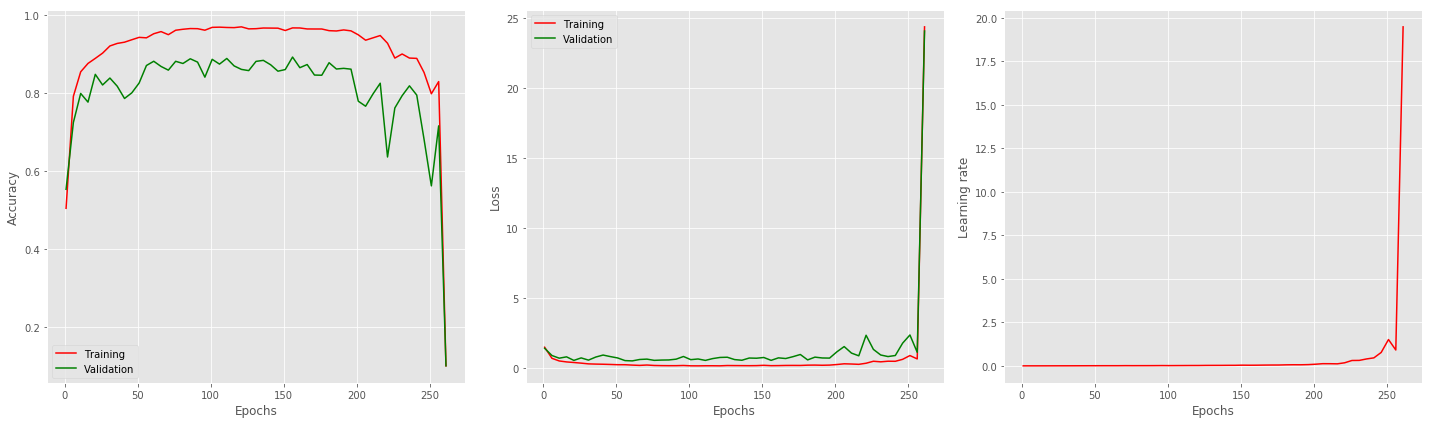

In [38]:
plot(history)